In [1]:
import pandas as pd
data = pd.read_csv('FinalData.csv')
data.head()

,Unnamed: 0,Weight Class,Fighter Name,Last Fight Date,Age,Height,Reach,Sig. Strikes Landed/min,Striking Accuracy (%),Sig. Strikes Absorbed/min,...,SGHA,SGLL,SGLA,AD,ADTB,ADHG,ADTM,ADTS,SM,Unnamed: 59
0,0,Featherweight,Edson Barbosa,2023-10-14 00:00:00,38.0,5 ft 11 in,75 in,4.18,45,4.34,...,2.48,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,NaN
1,1,Featherweight,Lerone Murphy,2023-07-22 00:00:00,32.0,5 ft 9 in,73.50 in,3.65,50,2.4,...,13.60,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.50,NaN
2,2,Welterweight,Khaos Williams,2023-05-06 00:00:00,29.0,6 ft 0 in,77 in,5.77,39,5.33,...,4.38,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,NaN
3,3,Welterweight,Carlston Harris,2023-08-05 00:00:00,36.0,6 ft 0 in,76 in,2.93,50,2.44,...,6.25,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.40,NaN
4,4,Light Heavyweight,Rodolfo Bellato,2023-12-02 00:00:00,28.0,6 ft 3 in,75.5 in,6.47,62,5.9,...,18.47,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.15,NaN


In [2]:
# Convert 'Last Fight Date' to datetime format
data['Last Fight Date'] = pd.to_datetime(data['Last Fight Date'], errors='coerce')

# Remove the columns that are likely not useful
data_cleaned = data.drop(columns=['Unnamed: 0', 'Unnamed: 59'])

# Identify columns that are likely meant to be numeric but are of type object
numeric_columns = ['Height', 'Reach', 'Sig. Strikes Landed/min', 'Striking Accuracy (%)', 'Sig. Strikes Absorbed/min',
                   'Striking Defense (%)', 'Differential/min (+/-)', 'Control Time per Position Distance', 
                   'Control Time per Position Clinch', 'Control Time per Position Ground', 'Takedown Avg/15min', 
                   'Takedown Accuracy (%)', 'Takedown Defense (%)', 'Sub Attempt Avg/15min', 'Ground Control Time']

# Strip any non-numeric characters and convert to float
for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

# Check for any remaining columns with object type that should be numeric and convert them
remaining_object_columns = data_cleaned.select_dtypes(include='object').columns
for col in remaining_object_columns:
    try:
        data_cleaned[col] = pd.to_numeric(data_cleaned[col].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
    except:
        continue  # If it's not convertible, likely because it's genuinely categorical

# Re-check the dataset info to ensure changes have taken place
data_cleaned.info(), data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Weight Class                        0 non-null      float64       
 1   Fighter Name                        0 non-null      float64       
 2   Last Fight Date                     95 non-null     datetime64[ns]
 3   Age                                 96 non-null     float64       
 4   Height                              96 non-null     float64       
 5   Reach                               96 non-null     float64       
 6   Sig. Strikes Landed/min             94 non-null     float64       
 7   Striking Accuracy (%)               94 non-null     float64       
 8   Sig. Strikes Absorbed/min           94 non-null     float64       
 9   Striking Defense (%)                93 non-null     float64       
 10  Differential/min (+/-)      

(None,
    Weight Class  Fighter Name Last Fight Date   Age  Height  Reach  \
 0           NaN           NaN      2023-10-14  38.0   511.0   75.0   
 1           NaN           NaN      2023-07-22  32.0    59.0   73.5   
 2           NaN           NaN      2023-05-06  29.0    60.0   77.0   
 3           NaN           NaN      2023-08-05  36.0    60.0   76.0   
 4           NaN           NaN      2023-12-02  28.0    63.0   75.5   
 
    Sig. Strikes Landed/min  Striking Accuracy (%)  Sig. Strikes Absorbed/min  \
 0                     4.18                   45.0                       4.34   
 1                     3.65                   50.0                       2.40   
 2                     5.77                   39.0                       5.33   
 3                     2.93                   50.0                       2.44   
 4                     6.47                   62.0                       5.90   
 
    Striking Defense (%)  ...   SGHL   SGHA  SGLL  SGLA   AD  ADTB  ADHG  ADT

In [3]:
# Revert 'Weight Class' and 'Fighter Name' to object type from the original dataset
data_cleaned['Weight Class'] = data['Weight Class']
data_cleaned['Fighter Name'] = data['Fighter Name']

# Drop columns with excessive missing values
columns_to_drop = ['Ground Control Time', 'Control Time per Position Distance', 'Control Time per Position Clinch', 'Control Time per Position Ground']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

# Impute missing values for columns with a small number of missing data
# Here, we use median for numerical columns due to potential outliers
for col in data_cleaned.columns:
    if data_cleaned[col].isnull().sum() > 0 and data_cleaned[col].dtype != 'object':
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

# Check updated info and head to ensure correctness
data_cleaned.info(), data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Weight Class                 97 non-null     object        
 1   Fighter Name                 97 non-null     object        
 2   Last Fight Date              97 non-null     datetime64[ns]
 3   Age                          97 non-null     float64       
 4   Height                       97 non-null     float64       
 5   Reach                        97 non-null     float64       
 6   Sig. Strikes Landed/min      97 non-null     float64       
 7   Striking Accuracy (%)        97 non-null     float64       
 8   Sig. Strikes Absorbed/min    97 non-null     float64       
 9   Striking Defense (%)         97 non-null     float64       
 10  Differential/min (+/-)       97 non-null     float64       
 11  Strikes by Position to Head  97 non-null     fl

(None,
         Weight Class     Fighter Name Last Fight Date   Age  Height  Reach  \
 0      Featherweight    Edson Barbosa      2023-10-14  38.0   511.0   75.0   
 1      Featherweight    Lerone Murphy      2023-07-22  32.0    59.0   73.5   
 2       Welterweight   Khaos Williams      2023-05-06  29.0    60.0   77.0   
 3       Welterweight  Carlston Harris      2023-08-05  36.0    60.0   76.0   
 4  Light Heavyweight  Rodolfo Bellato      2023-12-02  28.0    63.0   75.5   
 
    Sig. Strikes Landed/min  Striking Accuracy (%)  Sig. Strikes Absorbed/min  \
 0                     4.18                   45.0                       4.34   
 1                     3.65                   50.0                       2.40   
 2                     5.77                   39.0                       5.33   
 3                     2.93                   50.0                       2.44   
 4                     6.47                   62.0                       5.90   
 
    Striking Defense (%)  ...

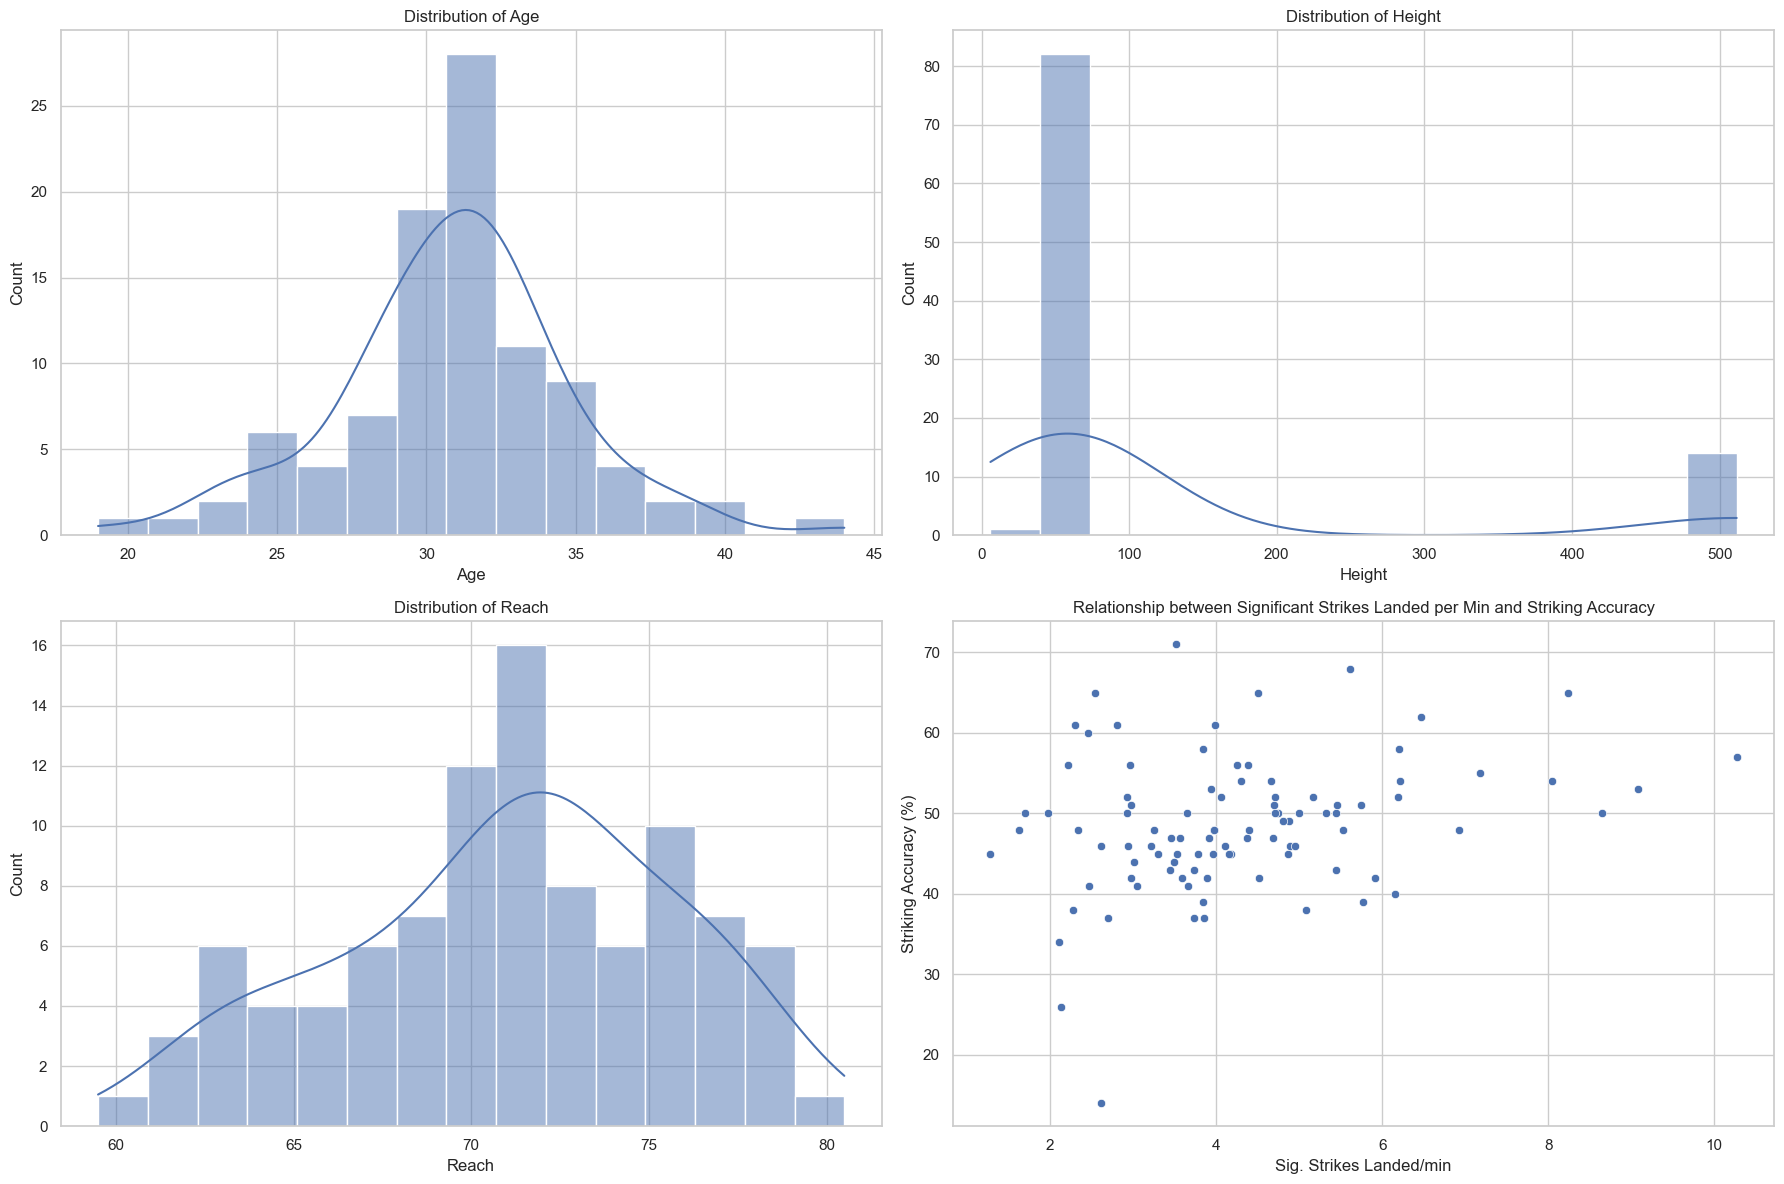

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(18, 12))

# Subplot 1: Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(data_cleaned['Age'], bins=15, kde=True)
plt.title('Distribution of Age')

# Subplot 2: Distribution of Height
plt.subplot(2, 2, 2)
sns.histplot(data_cleaned['Height'], bins=15, kde=True)
plt.title('Distribution of Height')

# Subplot 3: Distribution of Reach
plt.subplot(2, 2, 3)
sns.histplot(data_cleaned['Reach'], bins=15, kde=True)
plt.title('Distribution of Reach')

# Subplot 4: Relationship between Sig. Strikes Landed/min and Striking Accuracy (%)
plt.subplot(2, 2, 4)
sns.scatterplot(x='Sig. Strikes Landed/min', y='Striking Accuracy (%)', data=data_cleaned)
plt.title('Relationship between Significant Strikes Landed per Min and Striking Accuracy')

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
data_cleaned.head()

,Weight Class,Fighter Name,Last Fight Date,Age,Height,Reach,Sig. Strikes Landed/min,Striking Accuracy (%),Sig. Strikes Absorbed/min,Striking Defense (%),...,SGHL,SGHA,SGLL,SGLA,AD,ADTB,ADHG,ADTM,ADTS,SM
0,Featherweight,Edson Barbosa,2023-10-14,38.0,511.0,75.0,4.18,45.0,4.34,58.0,...,1.98,2.48,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
1,Featherweight,Lerone Murphy,2023-07-22,32.0,59.0,73.5,3.65,50.0,2.40,56.0,...,8.55,13.60,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.50
2,Welterweight,Khaos Williams,2023-05-06,29.0,60.0,77.0,5.77,39.0,5.33,43.0,...,2.88,4.38,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
3,Welterweight,Carlston Harris,2023-08-05,36.0,60.0,76.0,2.93,50.0,2.44,53.0,...,5.18,6.25,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.40
4,Light Heavyweight,Rodolfo Bellato,2023-12-02,28.0,63.0,75.5,6.47,62.0,5.90,44.0,...,12.93,18.47,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.15


In [7]:
from sklearn.preprocessing import OneHotEncoder

data = data_cleaned


# Convert 'Last Fight Date' to datetime format
data['Last Fight Date'] = pd.to_datetime(data['Last Fight Date'])

# Standardize 'Height' values (assumes the height format needs conversion from '511.0' to '71.0' for inches)
def convert_height_to_inches(height):
    feet = int(height / 100)
    inches = height % 100
    return feet * 12 + inches

data['Height'] = data['Height'].apply(convert_height_to_inches)

# One-hot encode 'Weight Class'
encoder = OneHotEncoder(sparse=False)
weight_class_encoded = encoder.fit_transform(data[['Weight Class']])
weight_class_encoded_df = pd.DataFrame(weight_class_encoded, columns=encoder.get_feature_names_out(['Weight Class']))

# Drop the original 'Weight Class' column and concatenate the new one-hot encoded columns
data.drop('Weight Class', axis=1, inplace=True)
data = pd.concat([data, weight_class_encoded_df], axis=1)

# Feature Engineering: Calculate days since the last fight
data['Days Since Last Fight'] = (pd.Timestamp.now().normalize() - data['Last Fight Date']).dt.days



c:\Users\msi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
data.to_csv('CleanData2.csv')